# Permutation test for unpaired or independent samples data

We now look at the case of unpaired data - data in which we wish to compare two groups but there are no particular links between individuals in one group and individuals in another group

Examples of experimental designs using independent samples would be (say) a comparison of science and humanities students, or first- and final-year students, where the individuals in each group are distinct.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns

## Toy example

[A toy example is an example witha  very small dataset, just to show how it works]

We are interested in whether cat owners or dog owners eat more yoghurt. We survey five cat owners and four dog owners and ask how many times in the last week they ate yogurt. We obtain the following data:

In [2]:
yog = pandas.DataFrame(data=[['cat',0],['cat',7],['cat',5],['cat',2],['cat',13],['dog',0],['dog',0],['dog',6],['dog',4]], columns=['Pet','Yoghurt'])
yog

,Pet,Yoghurt
0,cat,0
1,cat,7
2,cat,5
3,cat,2
4,cat,13
5,dog,0
6,dog,0
7,dog,6
8,dog,4


In [3]:
print('mean for cat owners: ' + str(yog[yog['Pet']=='cat']['Yoghurt'].mean()))
print('mean for dog owners: ' + str(yog[yog['Pet']=='dog']['Yoghurt'].mean()))
print('difference of means (cat-dog): ' + str(yog[yog['Pet']=='cat']['Yoghurt'].mean()-yog[yog['Pet']=='dog']['Yoghurt'].mean()))

mean for cat owners: 5.4
mean for dog owners: 2.5
difference of means (cat-dog): 2.9000000000000004


It seems the cat owners eat more yoghurt, on average, than the dog owners. 

Let's plot the data:

<AxesSubplot:xlabel='Pet', ylabel='Yoghurt'>

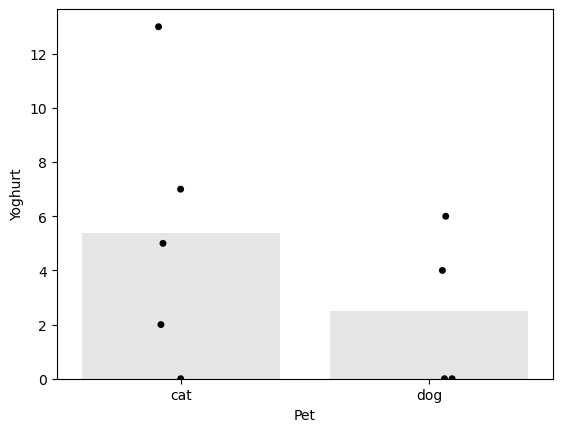

In [4]:
sns.barplot(data=yog, x='Pet', y='Yoghurt', color=[0.9,0.9,0.9], ci=None)
sns.stripplot(data=yog, x='Pet', y='Yoghurt', color=[0,0,0]) # this bit plots the dots

We note that the mean number of yoghurts eaten is higher for cat owners, but this may be skewed by one cat-owning yogurt enthusiast.

### Is this result statistically significant? 

That is, would the result (on average cat owners eat yoghurt 2.9 more times per week) be very unlikely to occur due to chance, if the null hypothesis were true, ie if there were no pet-based differences in the number of times a person eats yoghurt? 

To answer this question, we need to know what values difference of mean yoghurt consuption (for [cat - dog] owners) we would get due to chance - if actually all the people cat- and dog onders) were drawn from some distribution where the number of times yoghurt is eaten does not depend on which pet you have. 

If we drew lots of samples of 9 people from that yoghurt-eating population, even though there is no overall difference in yoghurt consumption between cat and dog owners, nonetheless we would almost always get some difference between the cat- and dog owners due to random chance. The distribution of these differences is called the <b>null distribution</b> of difference of means, that is, it is <b>the distribution we would expect to obtain if the null hypothesis were true</b>.

### Obtaining the null distribution by permutation testing

In previous weeks we have obtained simulated distributions of statistics such as the sample mean, by drawing many samples from a (known) parent population (as in the exercises on the Central Limit Theorem) or by bootstrapping. Here we will attempt to do something similar:

We don't have access to the parent population, only the sample of 9 yoghurt-eaters. The sample tells us several interesting things about the parent distribution, regardless of pet-based effects:
<ul>
    <li> most people eat yoghurt less than once a day
    <li> some people eat loads of yoghurt
        <ul><li> ie the distriution of differences has positive skew </ul>
</ul>

It also tells us about some potential pet-based effects:
<ul>
    <li> the number of times yoghurt is eaten tends to be higher for cat owners
    <li> the outlier individual who ate loads of yoghurt was a cat owner
</ul>

What we are going to do is shuffle the data around to create many new (re)samples preserving the non-pet-related information but ignoring the pet of the yoghurt-eater. Using these simulated (shuffled) datasets we will work out how often we get a difference of 2.9 or more iin the mean numbver of times yoghurt is eaten, between cat- and dog owners. This is equivalent to determining how likely our difference is to have occurred due to chance.



### Run the simulation

To generate new simulated datasets, we will shuffle around the datapoints in our original dataset. 

Which ones can we shuffle?

<ul>
<li>We assume there are no pet-based differences, so we can swap the pet-labels for any individuals in the sample
<li>We stick to the original sample sizes, ie 5 people should always be labelled as cat-owners and 4 as dog-owners
</ul>

To generate each new simulated dataset, we will randomly shuffle the values for number of times yoghurt was eaten, and then assign five values to 'cat owners' and four to 'dog owners'

Here is one such shuffle, try running it a few times and watching how the resulting dataframe changes

In [5]:
yog_shuffled = yog.copy()
yog_shuffled['Pet'] = np.random.permutation(yog.Pet) # replace the column 'Pet' with a random permutation of itself
yog_shuffled

,Pet,Yoghurt
0,cat,0
1,dog,7
2,cat,5
3,cat,2
4,dog,13
5,dog,0
6,cat,0
7,cat,6
8,dog,4


For each shuffled dataframe we obtain the relevant summary statistic, that is the mean number of times yogurt is eaten by cat owners - mean number of times yogurt is eaten by dog owners:

In [6]:
yog_shuffled[yog_shuffled['Pet']=='cat']['Yoghurt'].mean() - yog_shuffled[yog_shuffled['Pet']=='dog']['Yoghurt'].mean()

-3.4

### Visualizing randoms shuffles in the yoghurt data

Let's see how the difference of means changes over a few random shuffles.

Below I generate 4 random shuffles of our yoghurt data (in which individuals are randomly relabelled as cat-= or dog-owners, maintaining the correct number of cat- and dog-owners), and plot the outcomes:

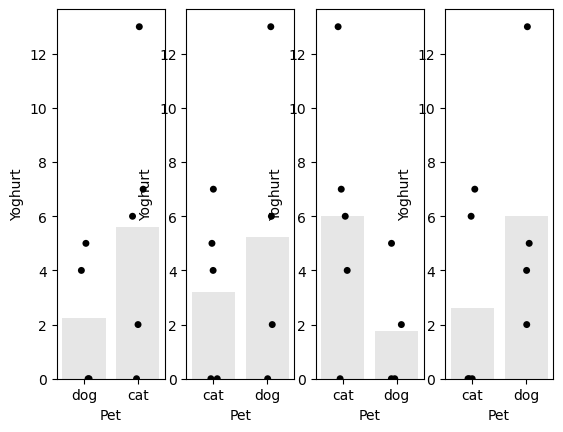

In [7]:
for n in range(4):
    yog_shuffled = yog.copy()  # work on a copy of the original dataframe
    yog_shuffled['Pet'] = np.random.permutation(yog.Pet) # replace the column 'Pet' with a random permutation of itself

    plt.subplot(1,4,n+1)
    sns.barplot(data=yog_shuffled, x='Pet', y='Yoghurt', color=[0.9,0.9,0.9], ci=None)
    sns.stripplot(data=yog_shuffled, x='Pet', y='Yoghurt', color=[0,0,0]) # this bit plots the dots

You can see that the difference of means (difference in heights of the bars) depends on whether more of the high-yoghurt individuals are assigned as cat owners, and also depends quite a lot on which group the 14-yoghurt individual ends up in.

### Obtain the summary statistic of interest

We are interested in the difference between the mean number of times cat- and dog-owners eat yoghurt. For each shuffle this is obtained as follows:

In [8]:
dMeans = yog_shuffled[yog_shuffled['Pet']=='cat']['Yoghurt'].mean() - yog_shuffled[yog_shuffled['Pet']=='dog']['Yoghurt'].mean()
print('mean difference for the last shuffle = ' + str(dMeans))

mean difference for the last shuffle = -3.4


### Plot the null distribution for a large number of shuffles

Now we can repeat the process for a large number of shuffles and get the mean number of times cat- and dog-owners eat yoghurt for each shuffle. The distribution of these differences of means is the null distribution to which our observed difference (the average for cat owners is 2.9 higher) is to be compared.


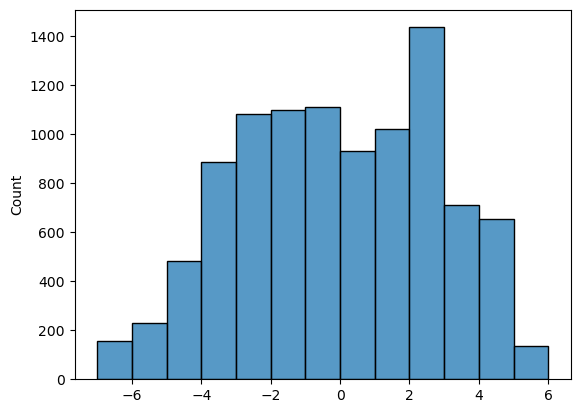

proportion >2.9 = 18.42%


In [9]:
nReps = 10000 # (number of shuffles)
dMeans = np.empty(nReps) # array to store mean difference for each shuffle

for i in range(nReps):
    yog_shuffled = yog.copy()  # work on a copy of the original dataframe
    yog_shuffled['Pet'] = np.random.permutation(yog.Pet) # replace the column 'Pet' with a random permutation of itself
    dMeans[i] = yog_shuffled[yog_shuffled['Pet']=='cat']['Yoghurt'].mean() - yog_shuffled[yog_shuffled['Pet']=='dog']['Yoghurt'].mean()
    
sns.histplot(dMeans, bins=range(-7,7))
plt.show()

print('proportion >2.9 = ' + str(100*np.mean(dMeans>2.9)) + '%')

### The $𝑝$-value¶

We can also calculate the proportion of cases in which the difference of means for cat- minus dog-owners exceeds the value we observed in our original sample, 2.9. This proportion is about 19%. It tells us that if we simulate a situation in which pet ownership does not determine the number of times yoghurt is eaten (but preserving some other important features of the dataset like the high skew), there is still a 19% chance that we would get an apparent pet-based difference as large as the one we observed in our 'real' data.

The probability that the test statistic (in this case, the difference in mean times yoghurt is eaten) would be observed if the null hypothesis were true, is sometimes called the $𝑝$-value.

Our permutation test shows that the $𝑝$-value associated with the observed difference of means is 0.19.

The result is considered statistically significant if $𝑝$ is smaller than some predetermined level, known as $\alpha$. Usually $\alpha=0.05$ or $\alpha=0.05$ is used, so the result is significant if $p=0.05$ or $p=0.01$. Our result would not normally be considered statistically significant (not even close).

## Use a built in function

Now you have seen how the permutation test works, we can learn how to run it more easily using the built in function <tt>scipy.stats.permutation_test</tt>

<b>Note-</b> You need scipy stats version > 1.8.0 to run this. You may need to check your version yb running the following code block.

In [10]:
import scipy as scipy
scipy.version.version

'1.9.3'

If this is less than 1.8.0 you need to update it -

Mac: open a terminal (Applications--Utilities--Terminal and type:
<tt> conda install -c conda-forge scipy=1.10.0 </tt>
                      
Windows: open an Anaconda terminal (spotlight search for anaconda and select the anaconda terminal app) and type:
<tt> conda install -c conda-forge scipy=1.10.0 </tt>

Please try and do this before the tutorial - otherwise your tutor will know you didn't read the prep work thoroughly ;-)

### Syntax of <tt>stats.permutation_test</tt>

Here is how we run the permutation test (same as the one we did with our own code above, although note how much more quickly this one runs!)

In [11]:
def dMeans(x, y):
    return np.mean(x)-np.mean(y)

stats.permutation_test((yog[yog['Pet']=='cat']['Yoghurt'], yog[yog['Pet']=='dog']['Yoghurt']), dMeans, permutation_type='independent', alternative='greater', n_resamples=10000)

PermutationTestResult(statistic=2.9000000000000004, pvalue=0.18253968253968253, null_distribution=array([ 2.9 , -2.95, -2.95, -0.25, -1.15,  2.  ,  2.  ,  4.7 ,  3.8 ,
       -3.85, -1.15, -2.05, -1.15, -2.05,  0.65,  0.65,  0.65,  3.35,
        2.45, -5.2 , -2.5 , -3.4 , -2.5 , -3.4 , -0.7 , -0.25,  2.45,
        1.55,  2.45,  1.55,  4.25, -3.4 , -4.3 , -1.6 , -1.6 , -0.25,
       -0.25,  2.45,  1.55, -6.1 , -3.4 , -4.3 , -3.4 , -4.3 , -1.6 ,
       -1.15,  1.55,  0.65,  1.55,  0.65,  3.35, -4.3 , -5.2 , -2.5 ,
       -2.5 , -2.5 ,  0.2 , -0.7 ,  0.2 , -0.7 ,  2.  , -5.65, -6.55,
       -3.85, -3.85, -0.7 , -1.6 ,  1.1 ,  1.1 , -4.75,  2.9 ,  2.9 ,
        5.6 ,  4.7 , -2.95, -0.25, -1.15, -0.25, -1.15,  1.55,  2.  ,
        4.7 ,  3.8 ,  4.7 ,  3.8 ,  6.5 , -1.15, -2.05,  0.65,  0.65,
        0.65,  3.35,  2.45,  3.35,  2.45,  5.15, -2.5 , -3.4 , -0.7 ,
       -0.7 ,  2.45,  1.55,  4.25,  4.25, -1.6 , -0.25,  2.45,  1.55,
        2.45,  1.55,  4.25, -3.4 , -4.3 , -1.6 , -1.6 ,  1.55,

Firstly, to reassure you this is doing a very similar job to our home-made code, check the p-value (should be about 0.18). 

We can also plot the null distribution, which hopefully looks simimlar to what we got from the home-made code:

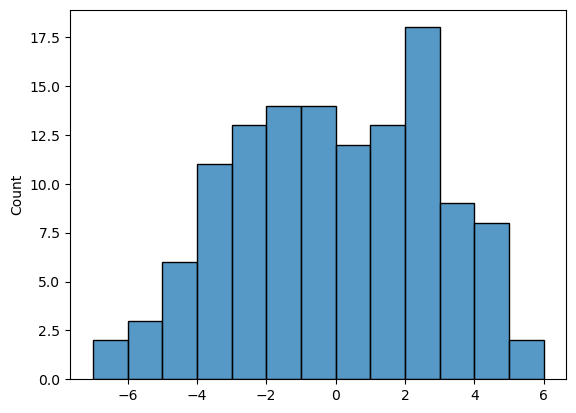

In [12]:
res = stats.permutation_test((yog[yog['Pet']=='cat']['Yoghurt'], yog[yog['Pet']=='dog']['Yoghurt']), dMeans, permutation_type='independent', alternative='greater', n_resamples=10000)
sns.histplot(res.null_distribution, bins=range(-7,7))
plt.show()

The syntax is very similar to that which we used for the paired test.

Firstly, we had to give the function <tt>stats.permutation_test</tt> our two samples (number of yogurts eaten by each cat owner, number of yogurts eaten by each dog owner) as a pair of <b>series</b>, rather than giving it the whole pandas dataframe as we do for many other stats functions.

Secondly, to tell <tt>stats.permutation_test</tt> the test statistic we want to get the null distribution of, we had to pass it a <i>function</i> called <tt>mDiff</tt>, and this function had to have the property that it takes in two series (number of yogurts eaten by each cat owner, number of yogurts eaten by each dog owner) and returns a single number the difference of means

### Defining a function

You will have come across this in datacamp but we haven't used it since. Don't be scared! It's unfamiliar but quite handy. On the other hand for an independent samples permutation test, the function I have given you for dMeans is always going to work, so if in doubt you can just copy it :-)

A function is a little computer programme that takes in some information (in this case, it takes in two series, (number of yogurts eaten by each cat owner, number of yogurts eaten by each dog owner) and returns some value (in this case the difference of means


In [13]:
# define a function - note how this differs from the function for mean difference, in the paired example
def dMeans(x, y):
    return np.mean(x)-np.mean(y)

here's another example:

In [14]:
# definte a new function that divides each element of x by 5 and each elemment of y by 2, and then adds up the results
def jackfruit(x,y):
    return sum(x/5) + sum(y/2)

sausages = np.array([1,2,3]) # one input array - have given it an arbitrary name
beans = np.array([10,20,30]) # another input array - have given it an arbitrary name

jackfruit(sausages,beans)

31.2

Now we can see how we could run <tt>stats.permutation_test</tt> on our function <tt>jackfruit</tt> and our data <tt>sausages</tt> and <tt>beans</tt>

In [15]:
## Another example

Let's go through another example. 

SyntaxError: EOL while scanning string literal (3338219531.py, line 3)